### Boston Housing Dataset Regression Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Preprocessing Data


In [ ]:
df= pd.read_csv('boston.csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


### Visualizing Data

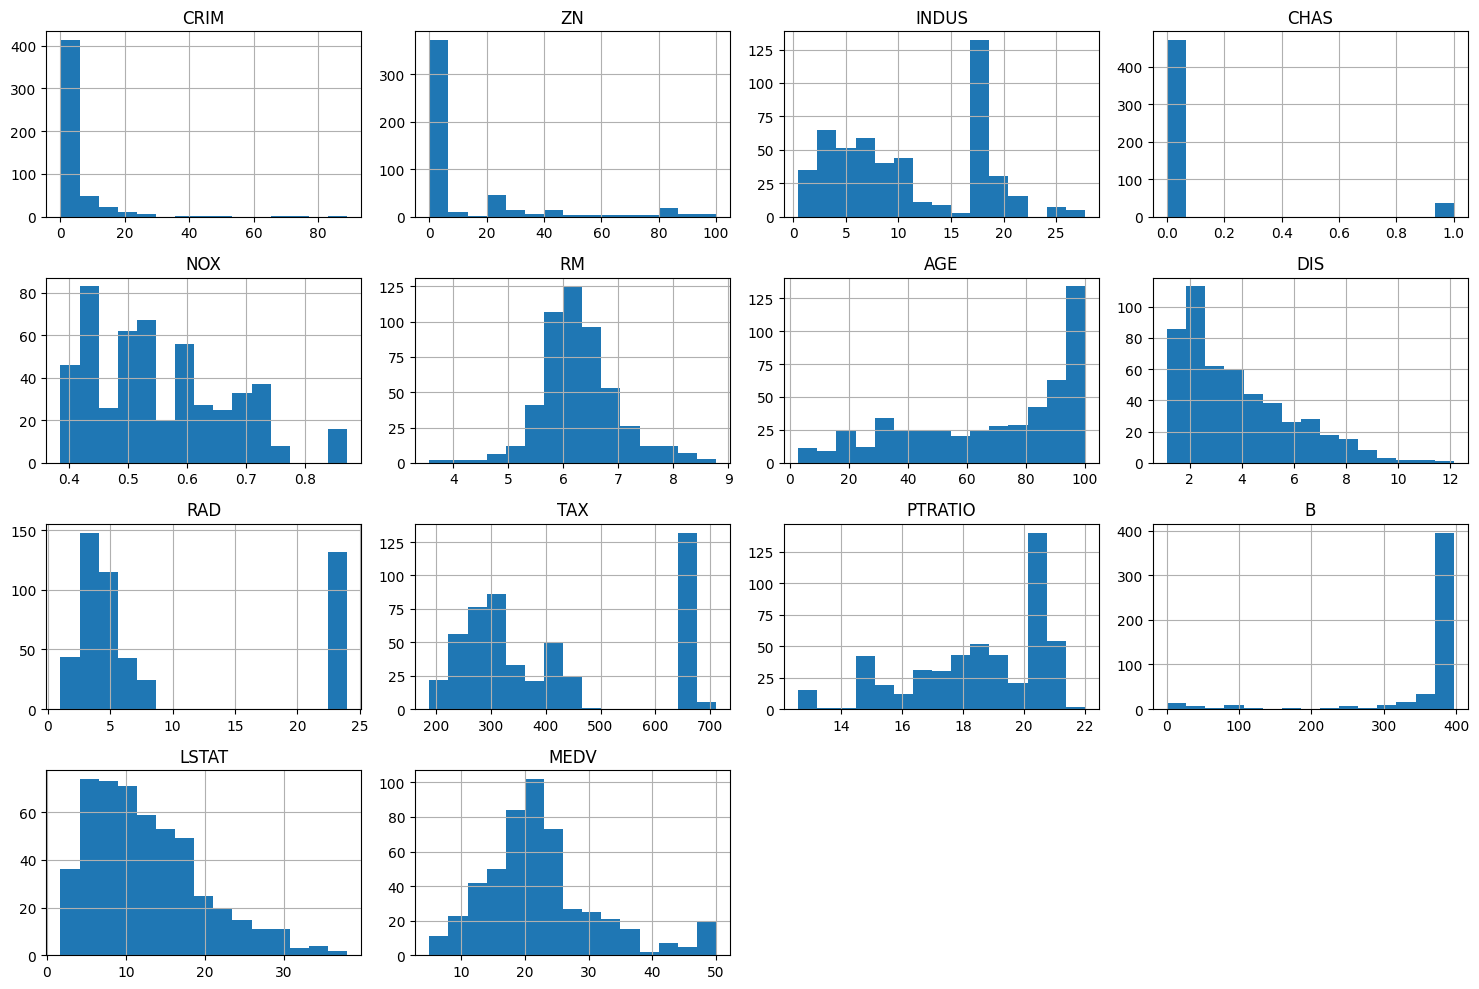

In [ ]:
numeric_df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

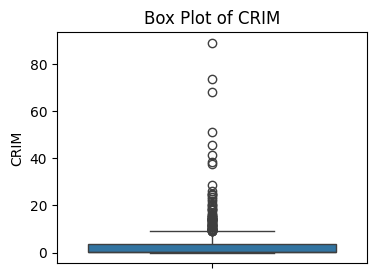

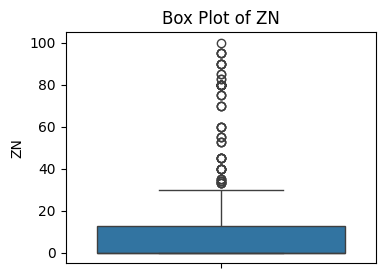

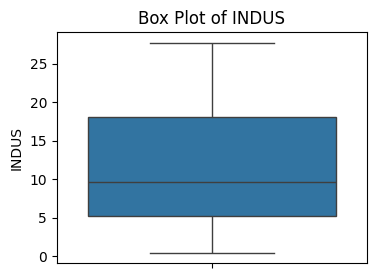

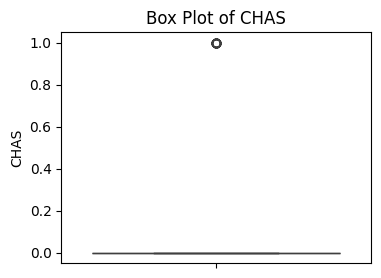

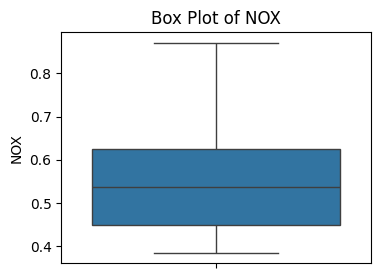

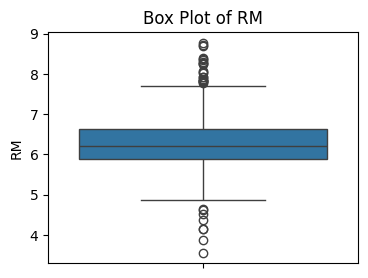

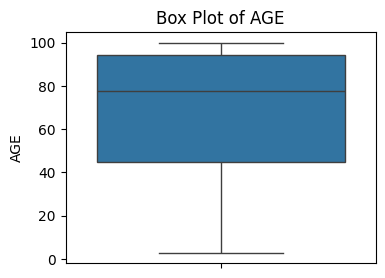

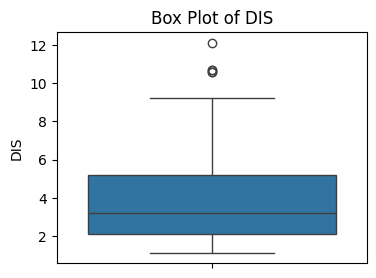

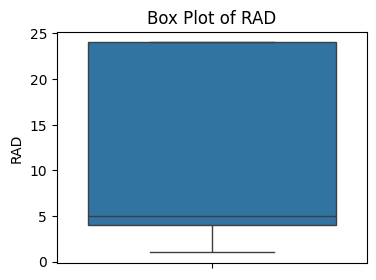

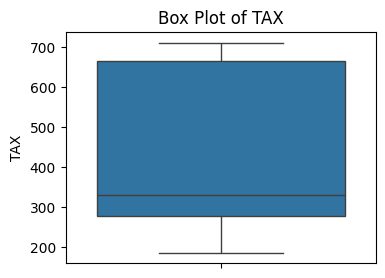

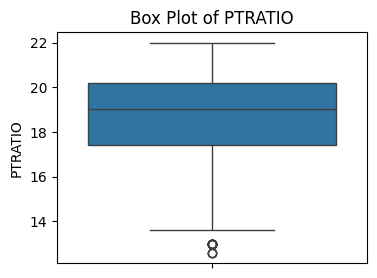

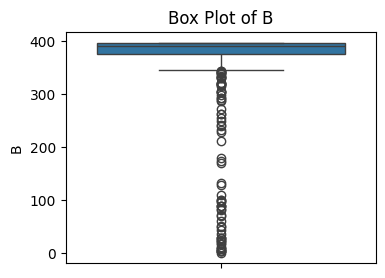

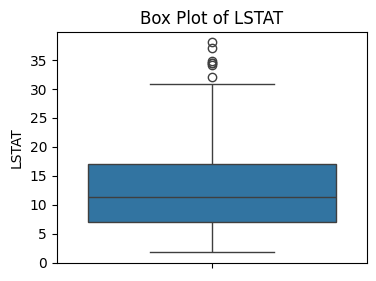

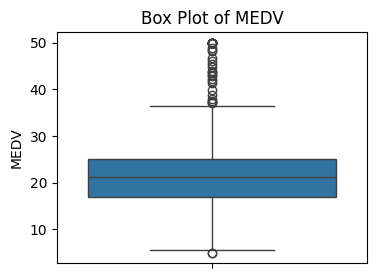

In [ ]:
for col in df.columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

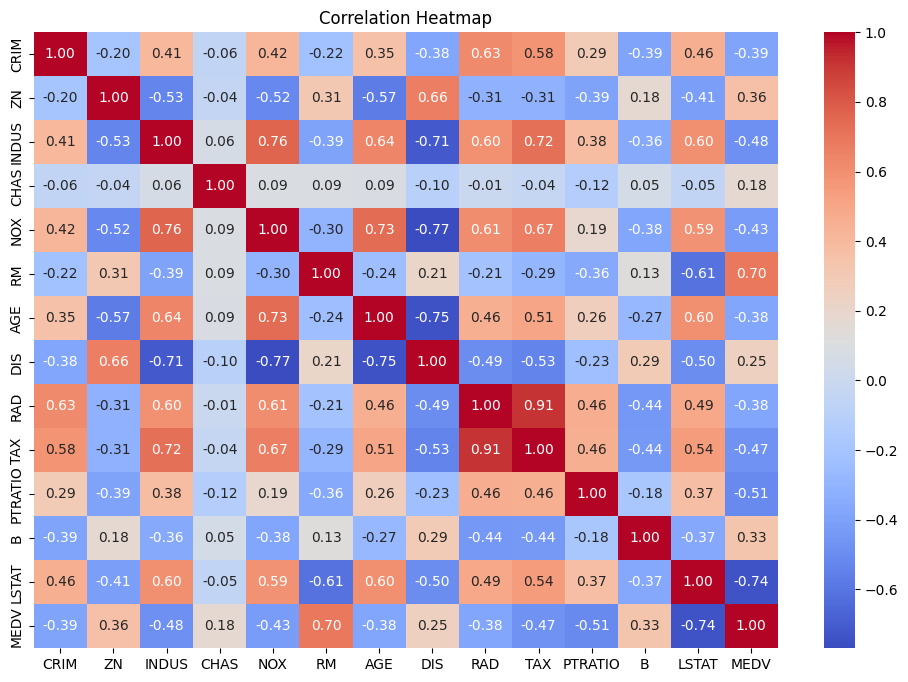

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

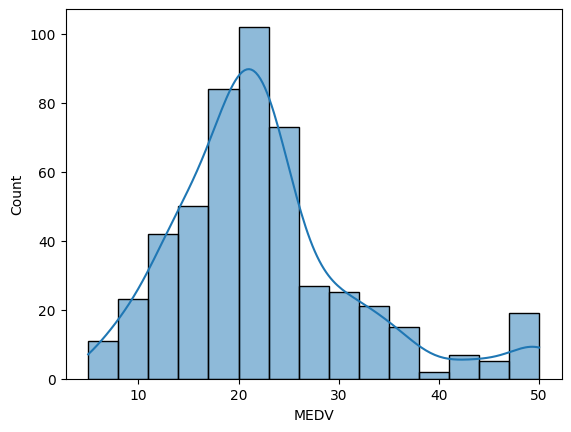

In [ ]:
sns.histplot(df['MEDV'],kde=True,bins=15)

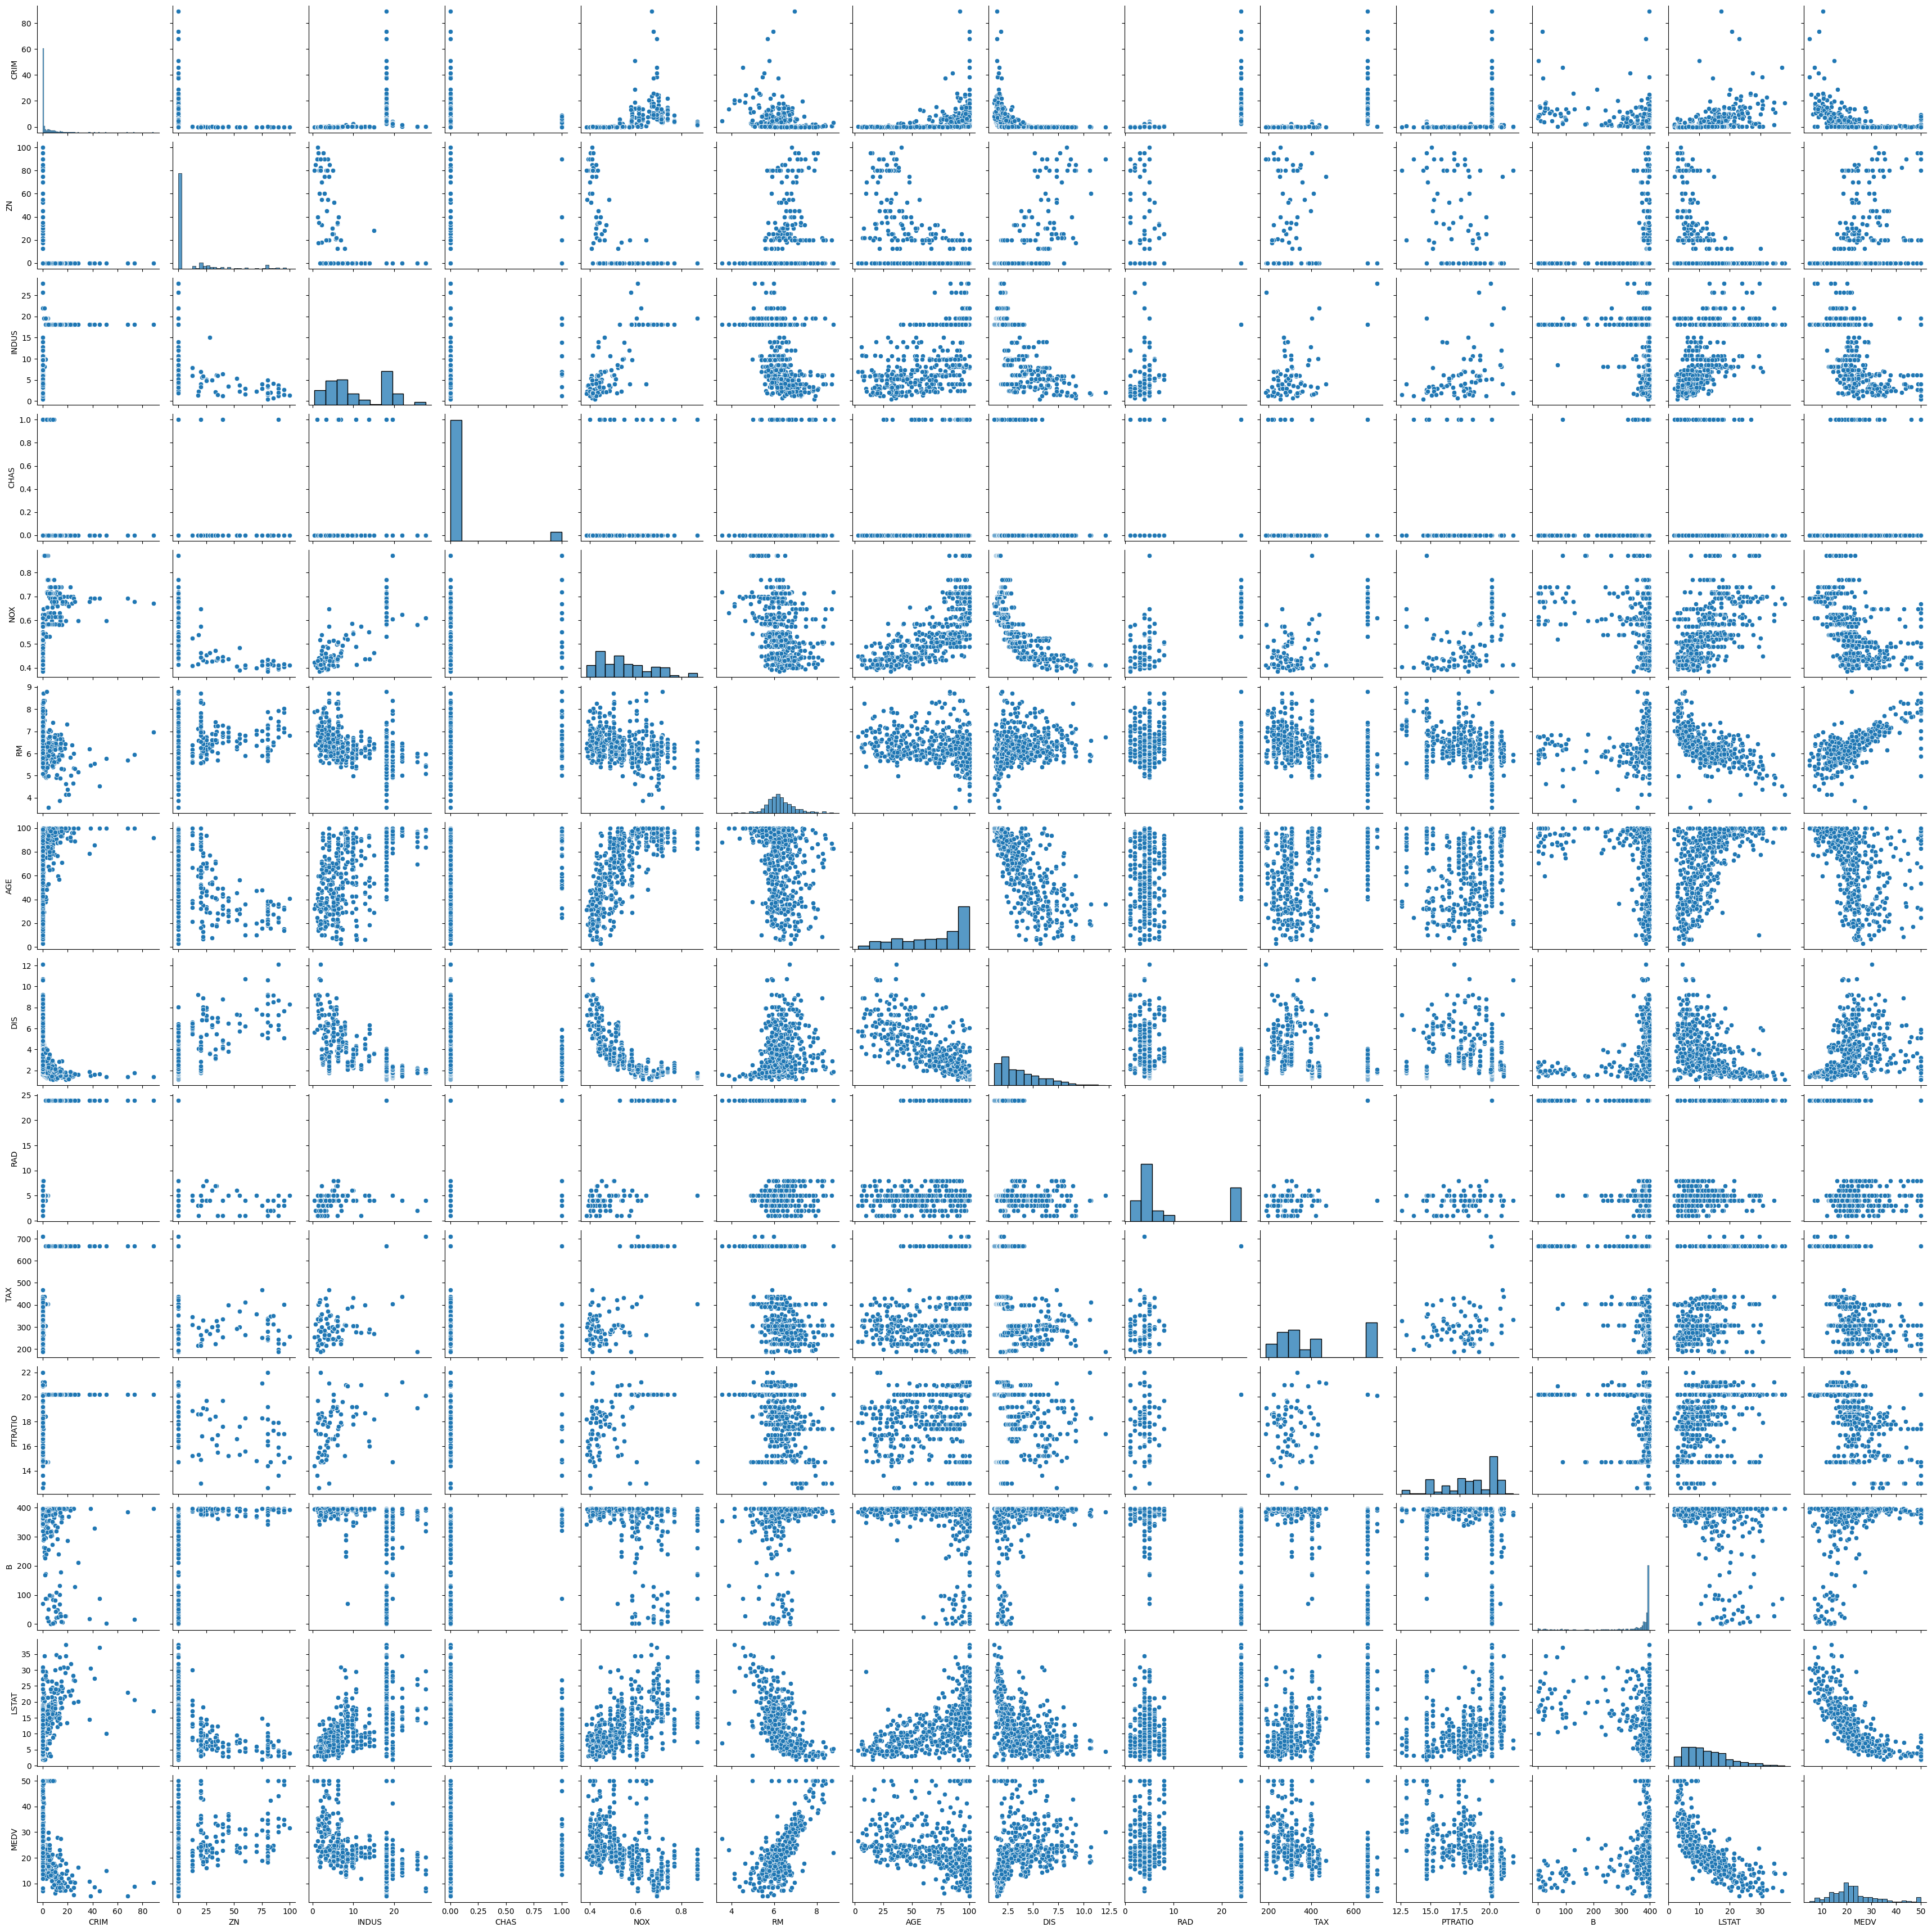

In [ ]:
sns.pairplot(df)
plt.show()

### Training and Fitting Regression Models to Determine Best
~

In [ ]:
X=df.drop(['MEDV'], axis=1)
y=df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r2

0.668759493535632

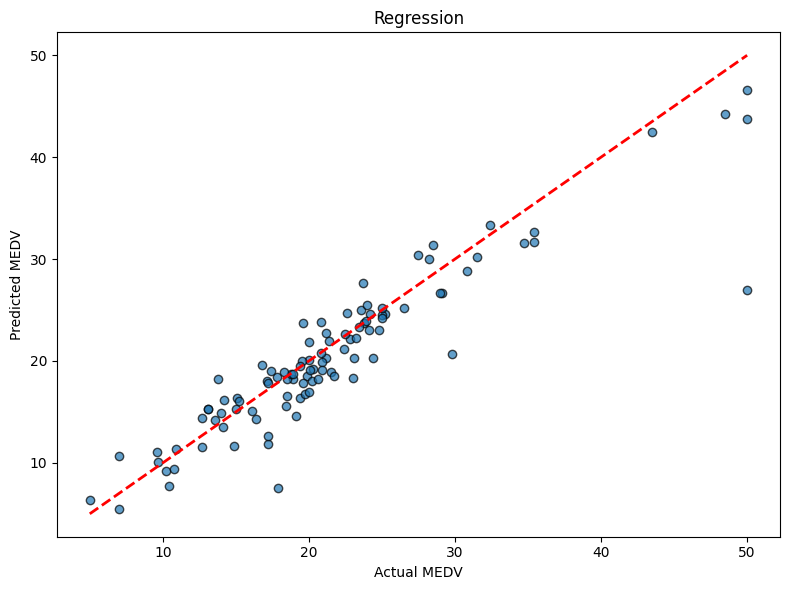

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
rf= RandomForestRegressor()
gb= GradientBoostingRegressor()
xgb= XGBRegressor()
svr= SVR()
dt= DecisionTreeRegressor()
knn= KNeighborsRegressor()

In [ ]:
params_rf = {"model__n_estimators": [50, 100],
             "model__max_depth": [None, 10]}

params_xgb = {"model__n_estimators": [50, 100],
              "model__learning_rate": [0.05, 0.1],
              "model__max_depth": [3, 10]}

params_gb = {"model__n_estimators": [50, 100],
             "model__learning_rate": [0.05, 0.1],
             "model__max_depth": [3, 5]}

params_svr = {"model__kernel": ["rbf", "linear"],
              "model__C": [0.1, 1, 10]}

param_dt = {"model__max_depth": [None, 5, 10],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2]}

param_knn = {"model__n_neighbors": [3, 5, 7],
             "model__weights": ["uniform", "distance"]}

In [ ]:
models = {'RandomForestRegressor':{'model':rf,'params':params_rf},
          'GradientBoostingRegressor':{'model':gb, 'params':params_gb},
          'XGBRegressor':{'model':xgb, 'params':params_xgb},
          'SVR':{'model':svr, 'params':params_svr },
          'DecisionTreeRegressor':{'model':dt,'params':param_dt},
          'KNeighborsRegressor':{'model':knn,'params':param_knn}}

Training RandomForestRegressor...


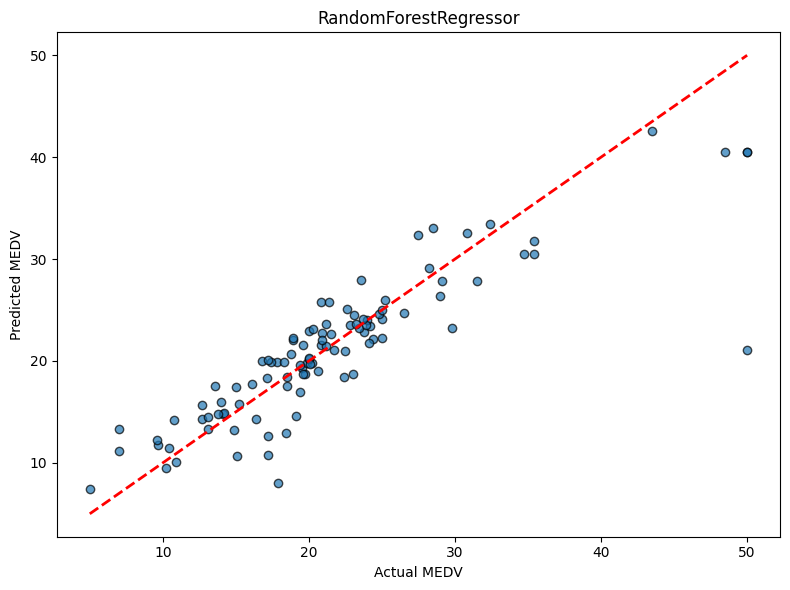

Training GradientBoostingRegressor...


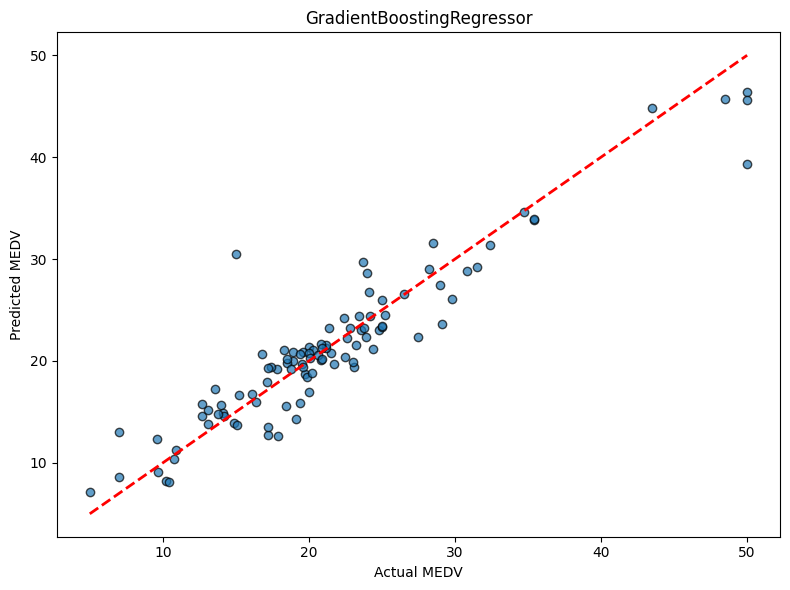

Training XGBRegressor...


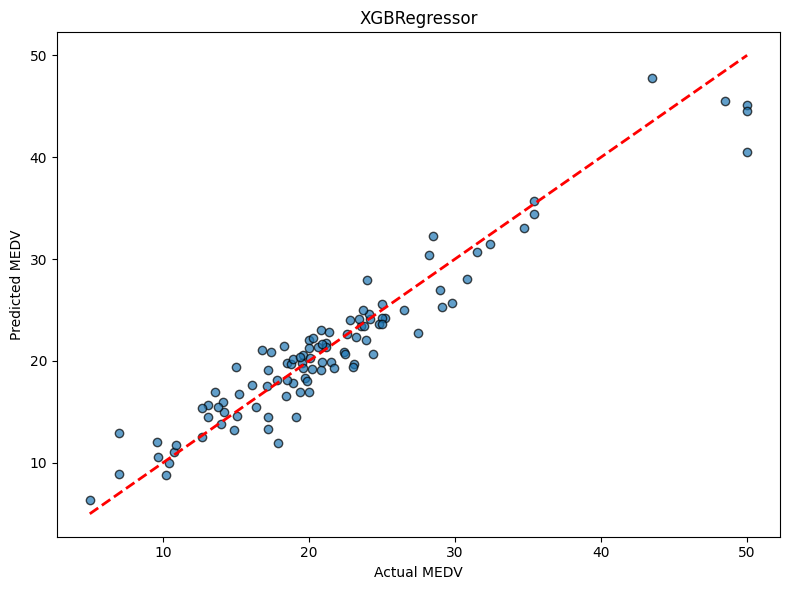

Training SVR...


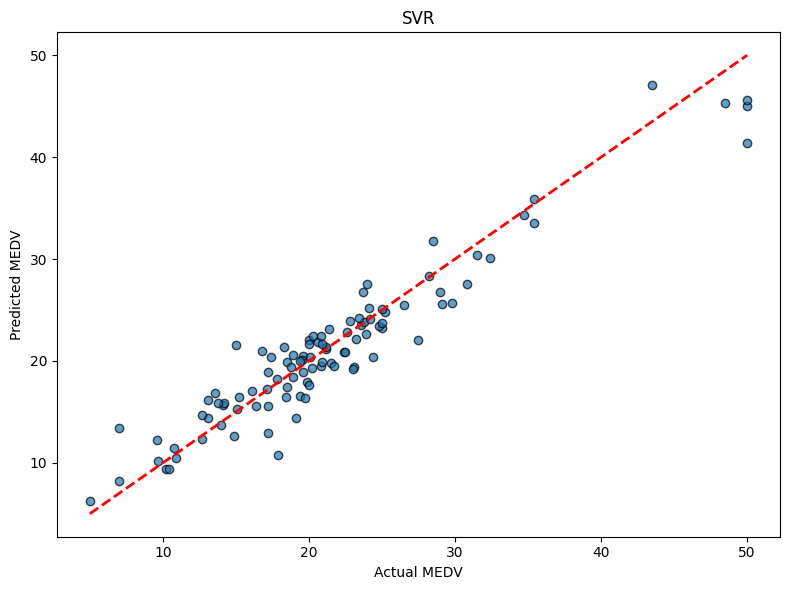

Training DecisionTreeRegressor...


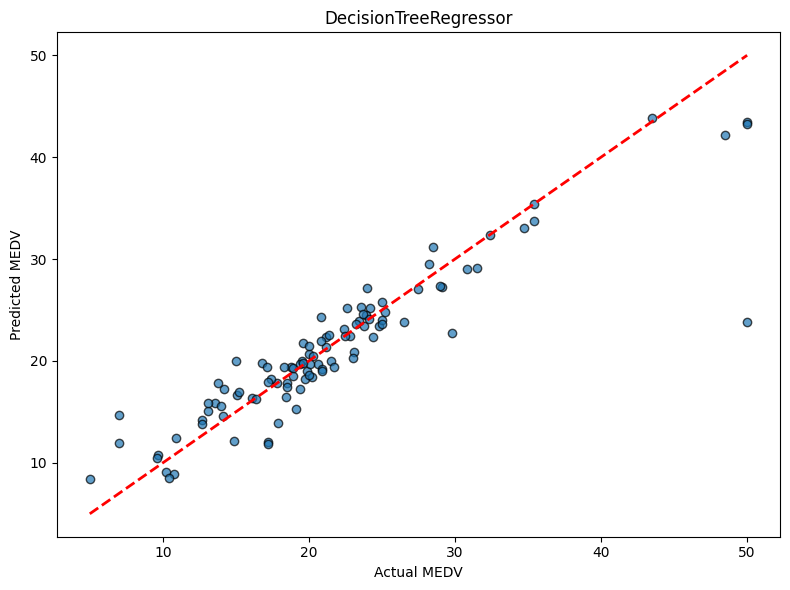

Training KNeighborsRegressor...


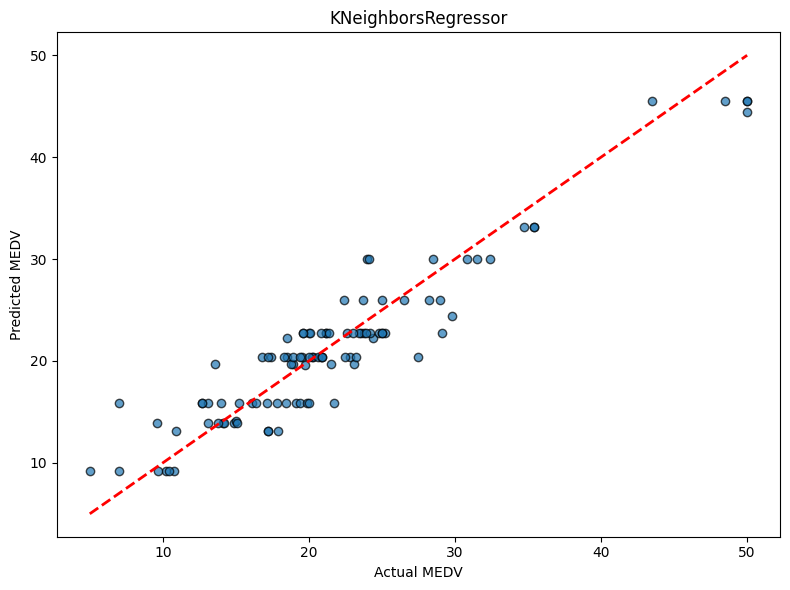

In [ ]:
results= []
best_r_squared= 0
best_model_name=None

for name, mp in models.items():
    print(f"Training {name}...")
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', mp['model'])
    ])

    grid = GridSearchCV(pipe, mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.xlabel('Actual MEDV')
    plt.ylabel('Predicted MEDV')
    plt.title(name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.tight_layout()
    plt.show()

    y_pred = grid.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({
        "model": name,
        "r2": r2,
        "mse": mse
    })

    if r2 > best_r_squared:
        best_r_squared = r2
        best_model_name = name
        best_model_object = grid.best_estimator_

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df

,model,r2,mse
0,RandomForestRegressor,0.879636,8.826775
1,GradientBoostingRegressor,0.915287,6.212344
2,XGBRegressor,0.910818,6.540067
3,SVR,0.826298,12.738192
4,DecisionTreeRegressor,0.884829,8.445940
5,KNeighborsRegressor,0.751638,18.213360


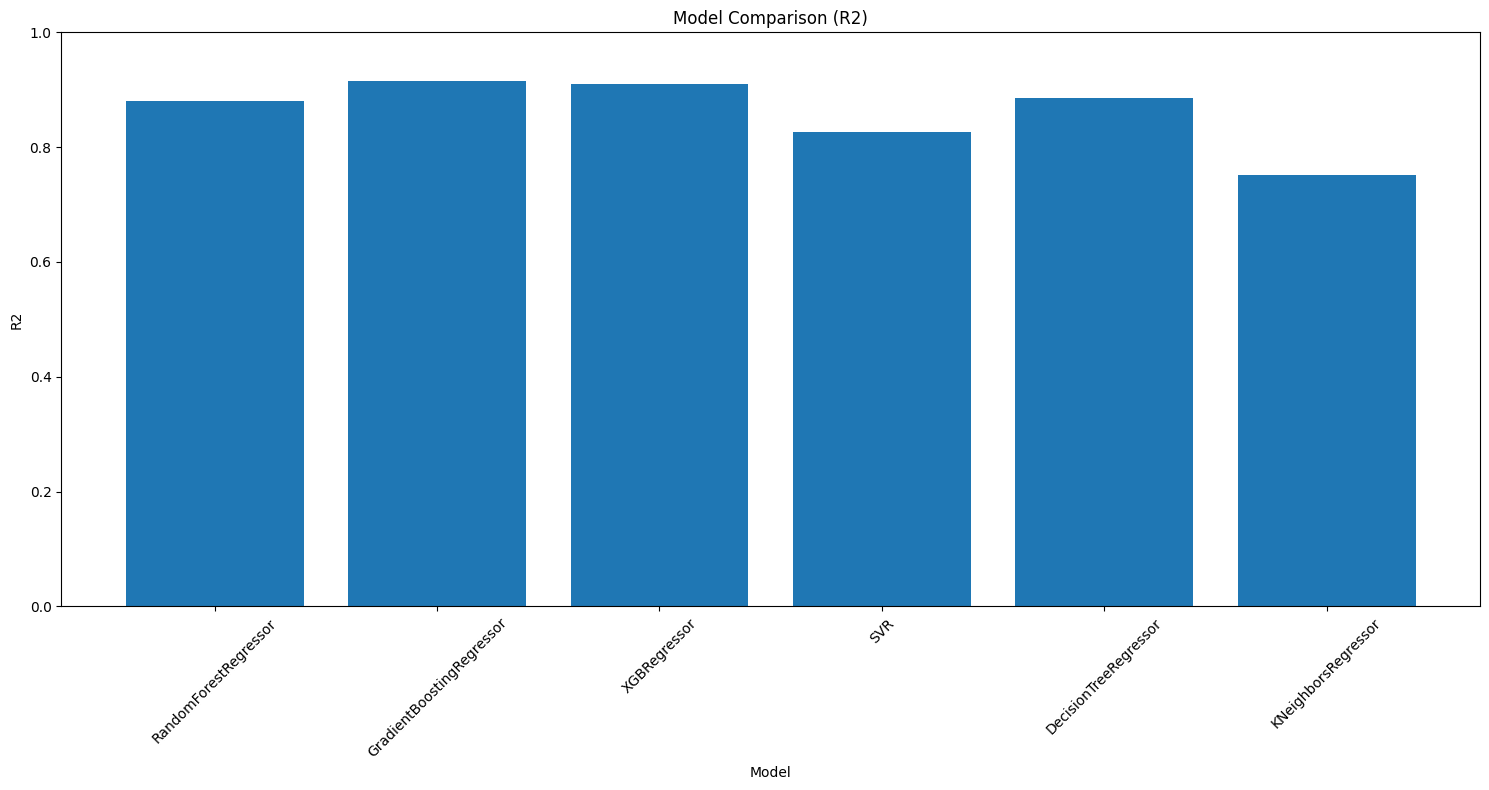

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(results_df['model'], results_df['r2'])
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Model Comparison (R2)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

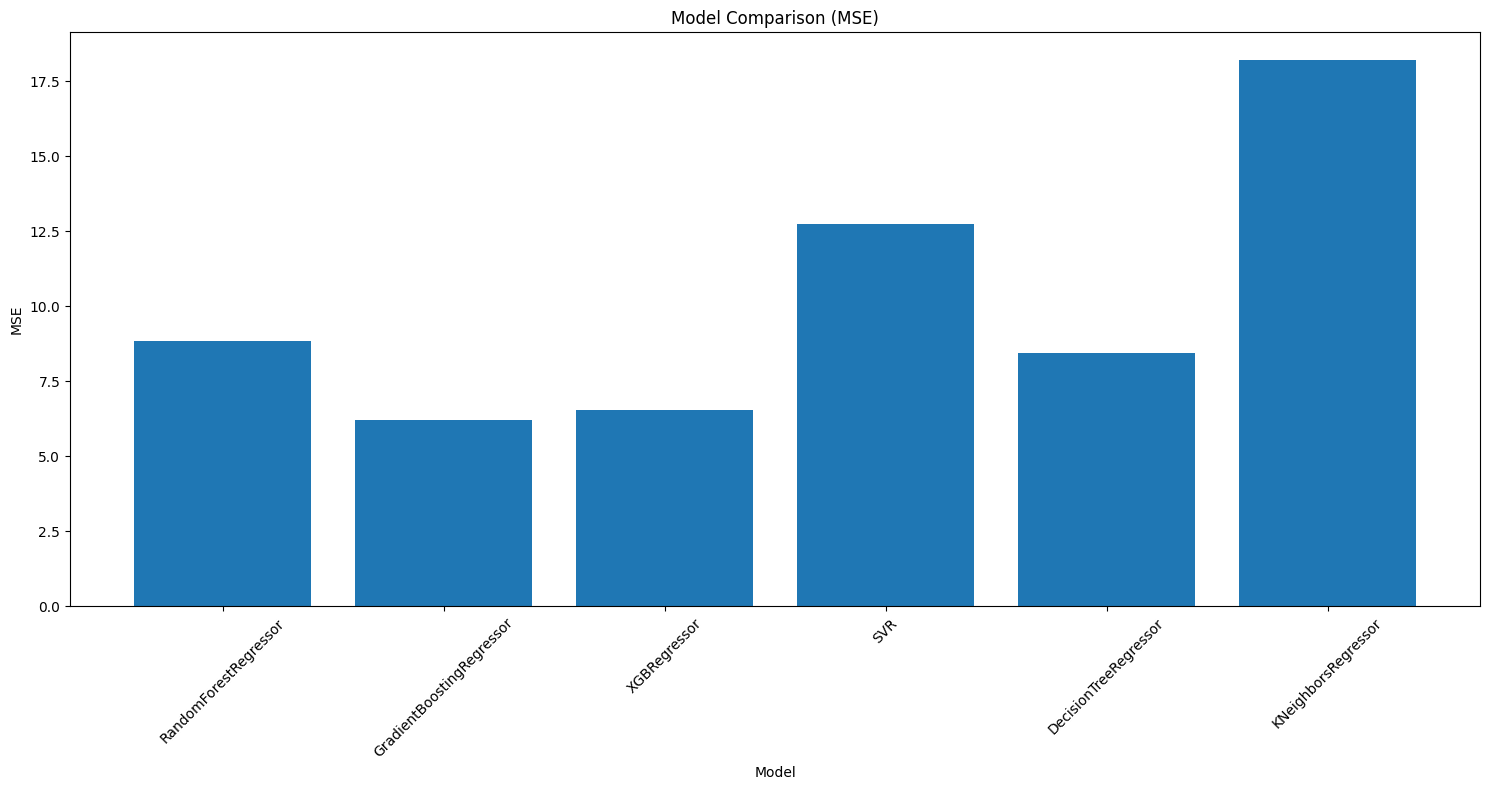

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(results_df['model'], results_df['mse'])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Comparison (MSE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
best_r_squared, best_model_name

(0.9151265822633928, 'GradientBoostingRegressor')

## Simple TensorFlow NN to Model Dataset

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
BATCH_SIZE = 32
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1024).batch(BATCH_SIZE)
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)



In [ ]:
def build_model():
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        layers.Dense(1)
    ])
    return model

In [ ]:
model = build_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mse','mae']
)

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=400,
    callbacks=[early_stop, checkpoint, lr_scheduler],
)

Epoch 1/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - loss: 621.6949 - mae: 23.4218 - mse: 621.6949

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 595.3476 - mae: 22.6838 - mse: 595.3476 - val_loss: 528.0672 - val_mae: 21.5009 - val_mse: 528.0672 - learning_rate: 0.0010
Epoch 2/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - loss: 556.1921 - mae: 21.0642 - mse: 556.1921

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 536.7614 - mae: 21.5573 - mse: 536.7614 - val_loss: 515.7037 - val_mae: 21.3557 - val_mse: 515.7037 - learning_rate: 0.0010
Epoch 3/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 523.2850 - mae: 21.4141 - mse: 523.2850

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 536.7863 - mae: 21.7743 - mse: 536.7863 - val_loss: 501.1397 - val_mae: 21.1296 - val_mse: 501.1397 - learning_rate: 0.0010
Epoch 4/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 460.4545 - mae: 20.5102 - mse: 460.4545

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 494.6297 - mae: 21.1442 - mse: 494.6297 - val_loss: 483.5766 - val_mae: 20.8206 - val_mse: 483.5766 - learning_rate: 0.0010
Epoch 5/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 518.5824 - mae: 21.7436 - mse: 518.5824

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 494.3690 - mae: 21.0366 - mse: 494.3690 - val_loss: 465.7455 - val_mae: 20.4868 - val_mse: 465.7455 - learning_rate: 0.0010
Epoch 6/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 436.1791 - mae: 20.4355 - mse: 436.1791

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 453.5075 - mae: 20.3470 - mse: 453.5075 - val_loss: 444.9524 - val_mae: 20.0853 - val_mse: 444.9524 - learning_rate: 0.0010
Epoch 7/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 482.8819 - mae: 20.1909 - mse: 482.8819

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 419.7145 - mae: 19.3738 - mse: 419.7145 - val_loss: 425.0032 - val_mae: 19.6808 - val_mse: 425.0032 - learning_rate: 0.0010
Epoch 8/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 303.3860 - mae: 16.9264 - mse: 303.3860

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 389.2478 - mae: 18.8603 - mse: 389.2478 - val_loss: 404.1218 - val_mae: 19.2371 - val_mse: 404.1218 - learning_rate: 0.0010
Epoch 9/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 415.3738 - mae: 19.3346 - mse: 415.3738

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 383.1376 - mae: 18.7736 - mse: 383.1376 - val_loss: 384.2288 - val_mae: 18.7905 - val_mse: 384.2288 - learning_rate: 0.0010
Epoch 10/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 368.5354 - mae: 18.3301 - mse: 368.5354

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 353.5103 - mae: 18.0607 - mse: 353.5103 - val_loss: 364.6965 - val_mae: 18.3324 - val_mse: 364.6965 - learning_rate: 0.0010
Epoch 11/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 267.8662 - mae: 16.0791 - mse: 267.8662

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 330.0458 - mae: 17.4716 - mse: 330.0458 - val_loss: 345.3016 - val_mae: 17.8505 - val_mse: 345.3016 - learning_rate: 0.0010
Epoch 12/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 277.3831 - mae: 16.0893 - mse: 277.3831

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 332.3884 - mae: 17.4317 - mse: 332.3884 - val_loss: 328.9925 - val_mae: 17.4175 - val_mse: 328.9925 - learning_rate: 0.0010
Epoch 13/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 211.4188 - mae: 13.8617 - mse: 211.4188

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 279.6935 - mae: 15.7733 - mse: 279.6935 - val_loss: 313.1805 - val_mae: 16.9827 - val_mse: 313.1805 - learning_rate: 0.0010
Epoch 14/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 289.9617 - mae: 15.9304 - mse: 289.9617

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 276.9298 - mae: 15.8686 - mse: 276.9298 - val_loss: 294.4919 - val_mae: 16.4444 - val_mse: 294.4919 - learning_rate: 0.0010
Epoch 15/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 353.8336 - mae: 18.0879 - mse: 353.8336

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 261.4118 - mae: 15.3471 - mse: 261.4118 - val_loss: 276.3684 - val_mae: 15.9153 - val_mse: 276.3684 - learning_rate: 0.0010
Epoch 16/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 251.8571 - mae: 14.8354 - mse: 251.8571

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 249.4960 - mae: 14.9084 - mse: 249.4960 - val_loss: 257.6666 - val_mae: 15.3441 - val_mse: 257.6666 - learning_rate: 0.0010
Epoch 17/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 241.3013 - mae: 14.9660 - mse: 241.3013

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 215.2462 - mae: 13.9176 - mse: 215.2462 - val_loss: 240.0904 - val_mae: 14.7740 - val_mse: 240.0904 - learning_rate: 0.0010
Epoch 18/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 232.4117 - mae: 14.5460 - mse: 232.4117

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 213.0547 - mae: 13.7199 - mse: 213.0547 - val_loss: 224.4760 - val_mae: 14.2541 - val_mse: 224.4760 - learning_rate: 0.0010
Epoch 19/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 172.9183 - mae: 12.5194 - mse: 172.9183

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 191.7527 - mae: 13.0723 - mse: 191.7527 - val_loss: 205.1879 - val_mae: 13.5904 - val_mse: 205.1879 - learning_rate: 0.0010
Epoch 20/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 284.6879 - mae: 16.1778 - mse: 284.6879

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 180.7599 - mae: 12.4599 - mse: 180.7599 - val_loss: 187.8609 - val_mae: 12.9616 - val_mse: 187.8609 - learning_rate: 0.0010
Epoch 21/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 278.8947 - mae: 15.8313 - mse: 278.8947

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 177.6412 - mae: 12.2624 - mse: 177.6412 - val_loss: 172.4357 - val_mae: 12.3722 - val_mse: 172.4357 - learning_rate: 0.0010
Epoch 22/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 143.6786 - mae: 11.2157 - mse: 143.6786

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 137.4547 - mae: 10.8612 - mse: 137.4547 - val_loss: 154.4442 - val_mae: 11.6453 - val_mse: 154.4442 - learning_rate: 0.0010
Epoch 23/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 168.7410 - mae: 12.2389 - mse: 168.7410

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 141.3694 - mae: 10.8904 - mse: 141.3694 - val_loss: 138.3859 - val_mae: 10.9577 - val_mse: 138.3859 - learning_rate: 0.0010
Epoch 24/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 110.7736 - mae: 9.7246 - mse: 110.7736

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 108.9351 - mae: 9.5005 - mse: 108.9351 - val_loss: 123.9115 - val_mae: 10.3020 - val_mse: 123.9115 - learning_rate: 0.0010
Epoch 25/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 119.6179 - mae: 9.8307 - mse: 119.6179

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 114.6225 - mae: 9.5728 - mse: 114.6225 - val_loss: 110.4149 - val_mae: 9.6528 - val_mse: 110.4149 - learning_rate: 0.0010
Epoch 26/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 106.7646 - mae: 9.0030 - mse: 106.7646

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.2170 - mae: 8.8770 - mse: 99.2170 - val_loss: 98.9638 - val_mae: 9.0832 - val_mse: 98.9638 - learning_rate: 0.0010
Epoch 27/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.7881 - mae: 5.6787 - mse: 40.7881

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.7216 - mae: 7.5828 - mse: 77.7216 - val_loss: 84.6110 - val_mae: 8.2754 - val_mse: 84.6110 - learning_rate: 0.0010
Epoch 28/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.6508 - mae: 6.8565 - mse: 67.6508

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 75.3719 - mae: 7.3493 - mse: 75.3719 - val_loss: 75.1594 - val_mae: 7.7391 - val_mse: 75.1594 - learning_rate: 0.0010
Epoch 29/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.0395 - mae: 5.3484 - mse: 42.0395

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 62.1046 - mae: 6.7071 - mse: 62.1046 - val_loss: 65.2674 - val_mae: 7.1357 - val_mse: 65.2674 - learning_rate: 0.0010
Epoch 30/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.7461 - mae: 8.3296 - mse: 83.7461

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.9253 - mae: 7.1268 - mse: 67.9253 - val_loss: 59.2847 - val_mae: 6.7156 - val_mse: 59.2847 - learning_rate: 0.0010
Epoch 31/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 54.1580 - mae: 6.1412 - mse: 54.1580

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 58.9134 - mae: 6.4875 - mse: 58.9134 - val_loss: 51.6030 - val_mae: 6.0998 - val_mse: 51.6030 - learning_rate: 0.0010
Epoch 32/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 61.4966 - mae: 6.8431 - mse: 61.4966

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.0155 - mae: 5.7595 - mse: 52.0155 - val_loss: 45.2154 - val_mae: 5.6424 - val_mse: 45.2154 - learning_rate: 0.0010
Epoch 33/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.3253 - mae: 5.9780 - mse: 47.3253

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.6851 - mae: 5.9174 - mse: 52.6851 - val_loss: 41.8579 - val_mae: 5.3469 - val_mse: 41.8579 - learning_rate: 0.0010
Epoch 34/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 38.4625 - mae: 5.2992 - mse: 38.4625

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.2345 - mae: 5.2267 - mse: 44.2345 - val_loss: 38.0803 - val_mae: 4.9635 - val_mse: 38.0803 - learning_rate: 0.0010
Epoch 35/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.9642 - mae: 4.5276 - mse: 27.9642

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 50.7098 - mae: 5.5222 - mse: 50.7098 - val_loss: 34.2371 - val_mae: 4.6118 - val_mse: 34.2371 - learning_rate: 0.0010
Epoch 36/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 67.2591 - mae: 6.2353 - mse: 67.2591

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.3805 - mae: 5.1718 - mse: 45.3805 - val_loss: 32.2123 - val_mae: 4.4727 - val_mse: 32.2123 - learning_rate: 0.0010
Epoch 37/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.9459 - mae: 3.8798 - mse: 22.9459

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.7944 - mae: 4.5231 - mse: 32.7944 - val_loss: 30.7530 - val_mae: 4.2831 - val_mse: 30.7530 - learning_rate: 0.0010
Epoch 38/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.6411 - mae: 4.3369 - mse: 38.6411

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.1407 - mae: 4.5928 - mse: 35.1407 - val_loss: 27.6555 - val_mae: 3.9114 - val_mse: 27.6555 - learning_rate: 0.0010
Epoch 39/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2441 - mae: 3.4772 - mse: 15.2441

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.0070 - mae: 4.1485 - mse: 30.0070 - val_loss: 25.5776 - val_mae: 3.6640 - val_mse: 25.5776 - learning_rate: 0.0010
Epoch 40/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 65.1656 - mae: 6.3664 - mse: 65.1656

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.9167 - mae: 4.6872 - mse: 37.9167 - val_loss: 25.0525 - val_mae: 3.6212 - val_mse: 25.0525 - learning_rate: 0.0010
Epoch 41/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.9685 - mae: 3.6277 - mse: 17.9685

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.5107 - mae: 4.5199 - mse: 33.5107 - val_loss: 23.5679 - val_mae: 3.4790 - val_mse: 23.5679 - learning_rate: 0.0010
Epoch 42/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 27.5482 - mae: 3.9894 - mse: 27.5482

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.4062 - mae: 4.0385 - mse: 26.4062 - val_loss: 22.1035 - val_mae: 3.3064 - val_mse: 22.1035 - learning_rate: 0.0010
Epoch 43/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.0245 - mae: 4.2343 - mse: 30.0245

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.5073 - mae: 3.9211 - mse: 26.5073 - val_loss: 20.4228 - val_mae: 3.1209 - val_mse: 20.4228 - learning_rate: 0.0010
Epoch 44/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 25.8914 - mae: 3.9589 - mse: 25.8914

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34.2976 - mae: 4.3002 - mse: 34.2976 - val_loss: 19.5244 - val_mae: 2.9803 - val_mse: 19.5244 - learning_rate: 0.0010
Epoch 45/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.8889 - mae: 3.8346 - mse: 24.8889 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.9084 - mae: 3.8341 - mse: 24.9084 - val_loss: 17.8199 - val_mae: 2.8216 - val_mse: 17.8199 - learning_rate: 0.0010
Epoch 46/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.3254 - mae: 3.2259 - mse: 17.3254

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.5615 - mae: 3.6083 - mse: 21.5615 - val_loss: 17.1059 - val_mae: 2.6789 - val_mse: 17.1059 - learning_rate: 0.0010
Epoch 47/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.1829 - mae: 3.5648 - mse: 20.1829 - val_loss: 17.4746 - val_mae: 2.7337 - val_mse: 17.4746 - learning_rate: 0.0010
Epoch 48/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.4760 - mae: 3.3978 - mse: 20.4760 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.7099 - mae: 3.4148 - mse: 20.7099 - val_loss: 16.3744 - val_mae: 2.6507 - val_mse: 16.3744 - learning_rate: 0.0010
Epoch 49/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.8028 - mae: 4.1182 - mse: 26.8028

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29.1113 - mae: 4.0967 - mse: 29.1113 - val_loss: 16.3613 - val_mae: 2.6793 - val_mse: 16.3613 - learning_rate: 0.0010
Epoch 50/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.9246 - mae: 4.0048 - mse: 27.9246 - val_loss: 17.9137 - val_mae: 2.8834 - val_mse: 17.9137 - learning_rate: 0.0010
Epoch 51/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.8237 - mae: 3.8415 - mse: 24.8237 - val_loss: 18.1414 - val_mae: 2.7864 - val_mse: 18.1414 - learning_rate: 0.0010
Epoch 52/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 33.1941 - mae: 4.2173 - mse: 33.1941

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.4468 - mae: 3.9341 - mse: 26.4468 - val_loss: 15.8399 - val_mae: 2.5829 - val_mse: 15.8399 - learning_rate: 0.0010
Epoch 53/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 29.9490 - mae: 3.7654 - mse: 29.9490

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.7740 - mae: 3.6616 - mse: 23.7740 - val_loss: 14.8102 - val_mae: 2.4319 - val_mse: 14.8102 - learning_rate: 0.0010
Epoch 54/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.6162 - mae: 3.4633 - mse: 20.6162  

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.6832 - mae: 3.4716 - mse: 20.6832 - val_loss: 14.1636 - val_mae: 2.3804 - val_mse: 14.1636 - learning_rate: 0.0010
Epoch 55/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.8782 - mae: 3.7547 - mse: 25.8782 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25.6373 - mae: 3.7382 - mse: 25.6373 - val_loss: 13.5253 - val_mae: 2.3120 - val_mse: 13.5253 - learning_rate: 0.0010
Epoch 56/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.2502 - mae: 3.7999 - mse: 25.2502 - val_loss: 13.5430 - val_mae: 2.3121 - val_mse: 13.5430 - learning_rate: 0.0010
Epoch 57/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.8518 - mae: 4.0715 - mse: 27.8518 - val_loss: 14.0373 - val_mae: 2.3252 - val_mse: 14.0373 - learning_rate: 0.0010
Epoch 58/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.5969 - mae: 3.6179 - mse: 21.5969 - val_loss: 15.1894 - val_mae: 2.4158 - val_mse: 15.1894 - learning_rate: 0.0010
Epoch 59/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.3522 - mae: 3.5205 - mse: 21.3522 - val_loss: 13.7872 - val_mae: 2.3423 - val_mse: 13.7872 - learning_rate: 0.0010
Epoch 60/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3052 - mae: 3.2814 - mse: 17.3052 - val_loss: 14.2564 - val

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.8280 - mae: 3.3475 - mse: 19.8280 - val_loss: 13.5094 - val_mae: 2.2873 - val_mse: 13.5094 - learning_rate: 5.0000e-04
Epoch 64/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.2315 - mae: 3.4260 - mse: 19.2315 - val_loss: 14.0053 - val_mae: 2.4010 - val_mse: 14.0053 - learning_rate: 5.0000e-04
Epoch 65/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.9936 - mae: 3.9371 - mse: 25.9936 - val_loss: 14.4532 - val_mae: 2.4725 - val_mse: 14.4532 - learning_rate: 5.0000e-04
Epoch 66/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.9707 - mae: 3.5079 - mse: 20.9707 - val_loss: 13.9208 - val_mae: 2.3710 - val_mse: 13.9208 - learning_rate: 5.0000e-04
Epoch 67/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.4424 - mae: 3.3571 - mse: 19.4424 - val_loss: 13.6906 - val_mae: 2.2644 - val_mse: 13.6906 - learning_rate: 5.0000e-04
Epoch 68/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 14.9268 - mae: 3.0622 - mse: 14.9268

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.9284 - mae: 3.7740 - mse: 23.9284 - val_loss: 13.4265 - val_mae: 2.2926 - val_mse: 13.4265 - learning_rate: 5.0000e-04
Epoch 69/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 14.6510 - mae: 3.0395 - mse: 14.6510

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.4633 - mae: 3.4054 - mse: 20.4633 - val_loss: 13.4245 - val_mae: 2.3082 - val_mse: 13.4245 - learning_rate: 5.0000e-04
Epoch 70/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.2766 - mae: 2.4468 - mse: 11.2766

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.5917 - mae: 3.4280 - mse: 20.5917 - val_loss: 13.2812 - val_mae: 2.2574 - val_mse: 13.2812 - learning_rate: 5.0000e-04
Epoch 71/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8764 - mae: 3.7313 - mse: 23.8764 - val_loss: 13.7100 - val_mae: 2.2418 - val_mse: 13.7100 - learning_rate: 5.0000e-04
Epoch 72/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.5258 - mae: 3.1913 - mse: 18.5258 - val_loss: 13.5749 - val_mae: 2.2239 - val_mse: 13.5749 - learning_rate: 5.0000e-04
Epoch 73/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.9133 - mae: 3.5878 - mse: 21.9133 - val_loss: 13.5200 - val_mae: 2.2642 - val_mse: 13.5200 - learning_rate: 5.0000e-04
Epoch 74/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.4559 - mae: 3.5954 - mse: 21.4559 - val_loss: 13.7507 - val_mae: 2.2972 - val_mse: 13.7507 - learning_rate: 5.0000e-04
Epoch 75/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 23.8132 - mae: 3.8853 - mse: 23.8132

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.3868 - mae: 3.4946 - mse: 20.3868 - val_loss: 12.8629 - val_mae: 2.2453 - val_mse: 12.8629 - learning_rate: 5.0000e-04
Epoch 76/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26.4048 - mae: 4.2059 - mse: 26.4048

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.4855 - mae: 3.8213 - mse: 23.4855 - val_loss: 12.6822 - val_mae: 2.1837 - val_mse: 12.6822 - learning_rate: 5.0000e-04
Epoch 77/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 46.6081 - mae: 5.1701 - mse: 46.6081

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.2633 - mae: 3.6797 - mse: 24.2633 - val_loss: 12.4001 - val_mae: 2.1810 - val_mse: 12.4001 - learning_rate: 5.0000e-04
Epoch 78/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 28.9853 - mae: 4.4571 - mse: 28.9853

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.7365 - mae: 3.9139 - mse: 24.7365 - val_loss: 12.3172 - val_mae: 2.2181 - val_mse: 12.3172 - learning_rate: 5.0000e-04
Epoch 79/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.2017 - mae: 3.3338 - mse: 19.2017 - val_loss: 12.6474 - val_mae: 2.1968 - val_mse: 12.6474 - learning_rate: 5.0000e-04
Epoch 80/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.4396 - mae: 3.4698 - mse: 22.4396 - val_loss: 12.8339 - val_mae: 2.1917 - val_mse: 12.8339 - learning_rate: 5.0000e-04
Epoch 81/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.6471 - mae: 3.8658 - mse: 25.6471 - val_loss: 12.9471 - val_mae: 2.2313 - val_mse: 12.9471 - learning_rate: 5.0000e-04
Epoch 82/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.6705 - mae: 3.5116 - mse: 23.6705 - val_loss: 12.8521 - val_mae: 2.2745 - val_mse: 12.8521 - learning_rate: 5.0000e-04
Epoch 83/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.6293 - mae: 3.3006 - mse: 18.6293 - val_

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.8581 - mae: 3.3610 - mse: 17.8581 - val_loss: 12.1449 - val_mae: 2.1864 - val_mse: 12.1449 - learning_rate: 2.5000e-04
Epoch 87/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.5040 - mae: 3.6941 - mse: 22.5040 - val_loss: 12.2717 - val_mae: 2.2118 - val_mse: 12.2717 - learning_rate: 2.5000e-04
Epoch 88/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.2158 - mae: 3.4561 - mse: 18.2158 - val_loss: 12.3517 - val_mae: 2.2109 - val_mse: 12.3517 - learning_rate: 2.5000e-04
Epoch 89/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6643 - mae: 3.4819 - mse: 19.6643 - val_loss: 12.3709 - val_mae: 2.2047 - val_mse: 12.3709 - learning_rate: 2.5000e-04
Epoch 90/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.3121 - mae: 3.3084 - mse: 20.3121 - val_loss: 12.3492 - val_mae: 2.2108 - val_mse: 12.3492 - learning_rate: 2.5000e-04
Epoch 91/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.7419 - mae: 3.4335 - mse: 19.7419 - val_

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.4083 - mae: 3.3946 - mse: 19.4083 - val_loss: 12.0578 - val_mae: 2.1909 - val_mse: 12.0578 - learning_rate: 1.2500e-04
Epoch 94/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.9293 - mae: 2.6034 - mse: 12.9293

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4427 - mae: 3.2587 - mse: 17.4427 - val_loss: 12.0117 - val_mae: 2.1807 - val_mse: 12.0117 - learning_rate: 1.2500e-04
Epoch 95/400
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.5244 - mae: 3.1115 - mse: 13.5244

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.6618 - mae: 3.2571 - mse: 17.6618 - val_loss: 12.0113 - val_mae: 2.1597 - val_mse: 12.0113 - learning_rate: 1.2500e-04
Epoch 96/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.2225 - mae: 4.5798 - mse: 37.2225 - val_loss: 12.0657 - val_mae: 2.1786 - val_mse: 12.0657 - learning_rate: 1.2500e-04
Epoch 97/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9693 - mae: 3.2927 - mse: 18.9693 - val_loss: 12.1330 - val_mae: 2.1958 - val_mse: 12.1330 - learning_rate: 1.2500e-04
Epoch 98/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.8996 - mae: 3.4039 - mse: 19.8996 - val_loss: 12.1459 - val_mae: 2.1899 - val_mse: 12.1459 - learning_rate: 1.2500e-04
Epoch 99/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.2392 - mae: 3.4782 - mse: 20.2392 - val_loss: 12.1829 - val_mae: 2.1996 - val_mse: 12.1829 - learning_rate: 1.2500e-04
Epoch 100/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.6982 - mae: 3.5973 - mse: 21.6982 - val

In [ ]:
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
mse

12.0113287415513

In [ ]:
r2

0.8362101582119112

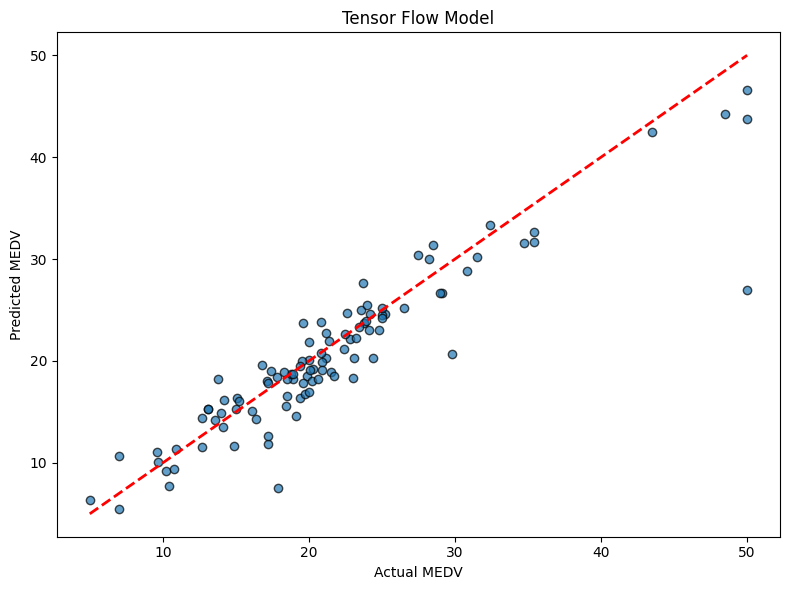

In [144]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Tensor Flow Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.tight_layout()
plt.show()